In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

import statsmodels.api as sm

In [5]:
X_train = pd.read_csv("Data/X_train.csv")
y_train = pd.read_csv("Data/y_train.csv")

X_test = pd.read_csv("Data/X_test.csv")
y_test = pd.read_csv("Data/y_test.csv")

In [13]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,0.371901,0.220000,0.307229,0.021472,0.061462,0.034722,0.463134,0.113553,0.232558,0.185393,0.492754,0.0,1.0
1,0.305785,0.166667,0.168675,0.065951,0.054817,0.069444,0.343318,0.129940,0.496124,0.196629,0.420290,0.0,1.0
2,0.239669,0.126667,0.198795,0.046012,0.041528,0.027778,0.089862,0.083478,0.279070,0.101124,0.362319,0.0,1.0
3,0.181818,0.173333,0.192771,0.049080,0.058140,0.041667,0.253456,0.076537,0.519380,0.123596,0.550725,0.0,1.0
4,0.165289,0.186667,0.228916,0.004601,0.046512,0.006944,0.158986,0.063428,0.434109,0.067416,0.492754,0.0,1.0


Base Model

In [21]:
params = {'max_features': range(1, 14, 1)}

rfr_grid = GridSearchCV(RandomForestRegressor(random_state = 1), 
                                                params, 
                                                n_jobs = -1, 
                                                scoring = "neg_root_mean_squared_error", 
                                                verbose = 1)
rfr_grid.fit(X_train, y_train.quality)
rfr_grid.best_params_

Fitting 5 folds for each of 13 candidates, totalling 65 fits


{'max_features': 3}

Text(0, 0.5, 'K-fold RMSE')

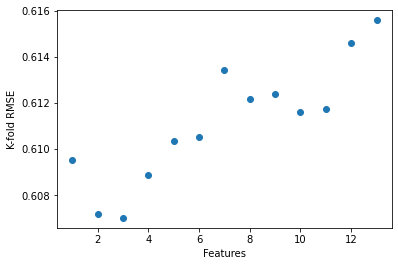

In [31]:
cv_results_rf = pd.DataFrame(rfr_grid.cv_results_)

plt.plot(cv_results_rf.param_max_features, -cv_results_rf.mean_test_score, 'o')
plt.xlabel('Features')
plt.ylabel('K-fold RMSE')

Examining the result of increasing the number of estimators

In [53]:
rfr_model_coarse = RandomForestRegressor(n_estimators= 900, max_features = 3, random_state = 1, n_jobs = -1).fit(X_train, y_train)
train_rmse = mean_squared_error(y_train, rfr_model_coarse.predict(X_train).round(), squared = False)
test_rmse = mean_squared_error(y_test, rfr_model_coarse.predict(X_test).round(), squared = False)

print("Training RMSE: {}".format(train_rmse))
print("Test RMSE: {}".format(test_rmse))

/var/folders/_x/qn4xkmz55j1g75w_xy65m99m0000gn/T/ipykernel_45401/2845292778.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model_coarse = RandomForestRegressor(n_estimators= 900, max_features = 3, random_state = 1, n_jobs = -1).fit(X_train, y_train)


Training RMSE: 0.19170803919425694
Test RMSE: 0.6725382459813659


In [54]:
rfr_model_coarse2 = RandomForestRegressor(n_estimators= 4000, max_features = 3, random_state = 1, n_jobs = -1).fit(X_train, y_train)
train_rmse = mean_squared_error(y_train, rfr_model_coarse2.predict(X_train).round(), squared = False)
test_rmse = mean_squared_error(y_test, rfr_model_coarse2.predict(X_test).round(), squared = False)

print("Training RMSE: {}".format(train_rmse))
print("Test RMSE: {}".format(test_rmse))

/var/folders/_x/qn4xkmz55j1g75w_xy65m99m0000gn/T/ipykernel_45401/3366225274.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model_coarse2 = RandomForestRegressor(n_estimators= 4000, max_features = 3, random_state = 1, n_jobs = -1).fit(X_train, y_train)


Training RMSE: 0.18816227403499663
Test RMSE: 0.6592536572635639


In [55]:
rfr_model_coarse3 = RandomForestRegressor(n_estimators= 6000, max_features = 3, random_state = 1, n_jobs = -1).fit(X_train, y_train)
train_rmse = mean_squared_error(y_train, rfr_model_coarse3.predict(X_train).round(), squared = False)
test_rmse = mean_squared_error(y_test, rfr_model_coarse3.predict(X_test).round(), squared = False)

print("Training RMSE: {}".format(train_rmse))
print("Test RMSE: {}".format(test_rmse))

/var/folders/_x/qn4xkmz55j1g75w_xy65m99m0000gn/T/ipykernel_45401/2130680553.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model_coarse3 = RandomForestRegressor(n_estimators= 6000, max_features = 3, random_state = 1, n_jobs = -1).fit(X_train, y_train)


Training RMSE: 0.18918213122865765
Test RMSE: 0.6604194471348085


Features of the best model so far: 4000 estimators, 3 max features

In [20]:
features = pd.DataFrame(list(zip(rfr_model_coarse2.feature_names_in_, rfr_model_coarse2.feature_importances_)), columns =['Feature_name', 'Importance'])
features = features.sort_values("Importance", ascending = False)
features.reset_index().drop(columns = "index")

,Feature_name,Importance
0,alcohol,0.173844
1,density,0.107004
2,volatile acidity,0.104448
3,free sulfur dioxide,0.085174
4,chlorides,0.084401
5,total sulfur dioxide,0.080122
6,sulphates,0.075277
7,residual sugar,0.075068
8,citric acid,0.075026
9,pH,0.070322


Tuning more parameters

In [56]:
params = {'n_estimators': [4000],
          'max_features': range(1, 14, 2),
          'max_depth': [3],
          'max_samples': range(1, X_train.shape[0], 500)}

rfr_grid_broad = RandomizedSearchCV(RandomForestRegressor(random_state = 1), 
                                                params, 
                                                n_jobs = -1, 
                                                scoring = "neg_root_mean_squared_error", 
                                                verbose = 1)
rfr_grid_broad.fit(X_train, y_train.quality)
rfr_grid_broad.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/amywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/amywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/amywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 385, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/amywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 111, in _get_n_samp

{'n_estimators': 4000, 'max_samples': 501, 'max_features': 9, 'max_depth': 3}

In [58]:
train_rmse = mean_squared_error(y_train, rfr_grid_broad.predict(X_train).round(), squared = False)
test_rmse = mean_squared_error(y_test, rfr_grid_broad.predict(X_test).round(), squared = False)

print("Training RMSE: {}".format(train_rmse))
print("Test RMSE: {}".format(test_rmse))

Training RMSE: 0.7802645555206809
Test RMSE: 0.7975925314055079


Tune all parameters, since only tuning max_features and max_samples made RMSE worse

In [38]:
params = {'n_estimators': range(100, 5000, 100),
          'max_features': range(1, 14, 2),
          'max_depth': range(2,30, 2),
          'max_samples': range(1, X_train.shape[0], 500)}

rfr_grid_fine = RandomizedSearchCV(RandomForestRegressor(random_state = 1), 
                                                params, 
                                                n_jobs = -1, 
                                                scoring = "neg_root_mean_squared_error", 
                                                verbose = 1)
rfr_grid_fine.fit(X_train, y_train.quality)
rfr_grid_fine.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/amywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/amywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/amywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 385, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/amywang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 111, in _get_n_sampl

{'n_estimators': 1700, 'max_samples': 4001, 'max_features': 7, 'max_depth': 20}

Text(0, 0.5, 'K-fold RMSE')

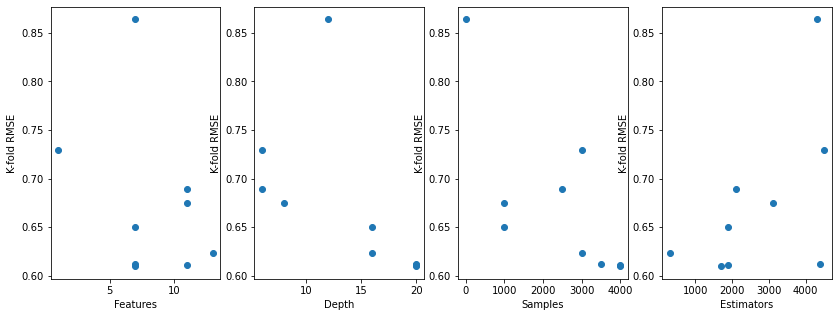

In [39]:
cv_results_rf = pd.DataFrame(rfr_grid_fine.cv_results_)

fig, axes = plt.subplots(1, 4, figsize = (14,5))
plt.subplots_adjust(wspace = 0.2)
axes[0].plot(cv_results_rf.param_max_features, -cv_results_rf.mean_test_score, 'o')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('K-fold RMSE')

axes[1].plot(cv_results_rf.param_max_depth, -cv_results_rf.mean_test_score, 'o')
axes[1].set_xlabel('Depth')
axes[1].set_ylabel('K-fold RMSE')

axes[2].plot(cv_results_rf.param_max_samples, -cv_results_rf.mean_test_score, 'o')
axes[2].set_xlabel('Samples')
axes[2].set_ylabel('K-fold RMSE')

axes[3].plot(cv_results_rf.param_n_estimators, -cv_results_rf.mean_test_score, 'o')
axes[3].set_xlabel('Estimators')
axes[3].set_ylabel('K-fold RMSE')

In [51]:
# Manually adjusting based on trends in plots

# {'n_estimators': 1700, 'max_samples': 4001, 'max_features': 7, 'max_depth': 20} - Test RMSE 0.6821910402406465
# {'n_estimators': 3700, 'max_samples': 5000, 'max_features': 7, 'max_depth': 20} - Test RMSE 0.6713934992009014
# {'n_estimators': 5000, 'max_samples': 5000, 'max_features': 7, 'max_depth': 35} - Test RMSE 0.6702467972551374

rfr_model = RandomForestRegressor(n_estimators= 4000, max_features = 7, max_samples = 5000, max_depth = 50, random_state = 1, n_jobs = -1).fit(X_train, y_train)
train_rmse = mean_squared_error(y_train, rfr_model.predict(X_train).round(), squared = False)
test_rmse = mean_squared_error(y_test, rfr_model.predict(X_test).round(), squared = False)

print("Training RMSE: {}".format(train_rmse))
print("Test RMSE: {}".format(test_rmse))

/var/folders/_x/qn4xkmz55j1g75w_xy65m99m0000gn/T/ipykernel_45401/377503294.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model = RandomForestRegressor(n_estimators= 4000, max_features = 7, max_samples = 5000, max_depth = 50, random_state = 1, n_jobs = -1).fit(X_train, y_train)


Training RMSE: 0.20386868290435214
Test RMSE: 0.6690981300917733


In [52]:
features = pd.DataFrame(list(zip(rfr_model.feature_names_in_, rfr_model.feature_importances_)), columns =['Feature_name', 'Importance'])
features = features.sort_values("Importance", ascending = False)
features.reset_index().drop(columns = "index")

,Feature_name,Importance
0,alcohol,0.209759
1,volatile acidity,0.113863
2,density,0.094610
3,free sulfur dioxide,0.088831
4,sulphates,0.075377
5,total sulfur dioxide,0.074290
6,residual sugar,0.074006
7,chlorides,0.073781
8,pH,0.069276
9,citric acid,0.066261


These parameters gave the best model overall: {n_estimators= 4000, max_features = 3}. RMSE = 0.6592536572635639 <br>
Tuning max_samples and max_depth with these two parameters fixed gave a worse RMSE. Retuning everything simultaneously gave a slightly worse RMSE than the base best model: 0.6690981300917733 .
